In [14]:
import numpy as np
import pandas as pd
import os

In [4]:
def attention_filename_for_hla_and_peptide(hla, peptide):
    return f"results/attention\\{hla.replace(':', '_').replace('*', '_')}_{peptide}_attention.csv"

In [1]:
aa_array = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

In [3]:
contribs = np.zeros((20, 14))

In [11]:
data = pd.read_csv(attention_filename_for_hla_and_peptide("HLA-A*01:01", "AAHSARPPPY"))
print(data)
type(data)
data.columns

aminoacids = [data.columns[i][0] for i in range(1, len(data.columns))]
aminoacids

for i in range(1, len(data.columns)):
    print("pos:", i, "aa:", aminoacids[i-1], "contribution:", data.iloc[-1, i])
    idx = aa_array.index(aminoacids[i-1])

    contribs[idx, i-1] += data.iloc[-1, i]


   Unnamed: 0         A       A.1         H         S       A.2         R  \
0           Y  0.094325  0.093094  0.128537  0.105539  0.068115  0.209524   
1           F  0.164958  0.149420  0.308848  0.340853  0.113617  0.849655   
2           A  0.213492  0.201716  0.229285  0.064774  0.215036  0.200010   
3           M  0.217335  0.241155  0.126787  0.070436  0.176070  0.397896   
4           Y  0.155086  0.155931  0.151623  0.121196  0.140737  0.285950   
5           Q  0.314955  0.240707  0.464012  0.044147  0.117955  0.735629   
6           E  0.073052  0.077965  0.208764  0.061027  0.059513  0.063901   
7           N  0.319620  0.247608  0.149875  0.062248  0.191860  0.215202   
8           M  0.190476  0.155494  0.091967  0.052482  0.084534  0.381217   
9           A  0.263867  0.292321  0.191308  0.184630  0.271488  0.258083   
10          H  0.632407  0.366633  0.460867  0.041554  0.134618  0.425589   
11          T  0.134182  0.122508  0.105289  0.128994  0.115079  0.071785   

In [12]:
contribs = np.zeros((20, 14))

In [15]:
pairs_data = pd.read_csv("1696_iedb_random_negative_pairs.csv")
print(pairs_data)
for i in range(len(pairs_data)):
    pep = pairs_data['peptide'][i]
    hla = pairs_data['hla'][i]

    if os.path.isfile(f"./{attention_filename_for_hla_and_peptide(hla, pep)}"):
        # print(f"{attention_filename_for_hla_and_peptide(hla, pep)} exists")
        data = pd.read_csv(attention_filename_for_hla_and_peptide(hla, pep))

        aminoacids = [data.columns[i][0] for i in range(1, len(data.columns))]

        for i in range(1, len(data.columns)):
            # print("pos:", i, "aa:", aminoacids[i-1], "contribution:", data.iloc[-1, i])
            idx = aa_array.index(aminoacids[i-1])

            contribs[idx, i-1] += data.iloc[-1, i]

contribs

        peptide          hla                        hla_sequence
0      DEFVVVTV  HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY
1      TLNNGSQA  HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY
2      LEDKAFQL  HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY
3      RYSHWTKL  HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY
4      NRKLLDIA  HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY
...         ...          ...                                 ...
1691  YIIPCILIL  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY
1692  SFLHWFHHL  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY
1693  KRMMIRYCL  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY
1694  FTARIIIFS  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY
1695  KSRRFTVRF  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY

[1696 rows x 3 columns]


array([[ 4.45570422,  5.6244897 ,  3.37625922,  3.22877797,  2.81328661,
         2.67541228,  1.89369431,  4.36248743,  3.97942297,  1.82731032,
         0.85675466,  0.28590169,  0.05892817,  0.        ],
       [13.73325194,  7.3499717 ,  2.78027219,  1.90226277,  1.88611756,
         1.74760681,  1.03924433,  2.25944094,  1.83207111,  1.16869527,
         1.61452757,  0.22784146,  0.26788648,  0.        ],
       [ 2.16739544,  1.59925429,  1.82246364,  1.57017653,  1.96657988,
         1.89562194,  1.55512257,  1.79958485,  0.9853301 ,  0.65311024,
         0.37975654,  0.50714803,  0.        ,  0.        ],
       [ 2.65948523,  4.31508724,  6.10892409,  4.29801031,  2.27907385,
         1.38918779,  0.81579024,  1.65773414,  1.69211281,  1.66084139,
         0.15756167,  0.        ,  0.        ,  0.        ],
       [ 0.80341663,  1.32468006,  1.1718564 ,  1.13657269,  0.65747504,
         0.56674658,  1.35395512,  0.56145216,  0.84900582,  0.3403371 ,
         0.40545733,  0.  

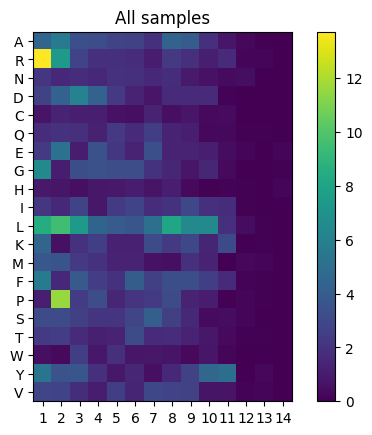

In [20]:
import matplotlib.pyplot as plt 
plt.imshow( contribs ) 
  
plt.title( "All samples" ) 
plt.colorbar() 
plt.xticks(ticks=range(14), labels=range(1, 15))
# plt.yticks(ticks=range(7), labels=range(8, 15))
plt.yticks(ticks=range(len(aa_array)), labels=aa_array)
plt.show() 

In [21]:
contribs_pos = np.zeros((20, 14))
contribs_neg = np.zeros((20, 14))

In [22]:
transphla_pairs = pd.read_csv("results/predict_results.csv")

print(transphla_pairs)
print(transphla_pairs['y_pred'])
for i in range(len(transphla_pairs)):
    pep = transphla_pairs['peptide'][i]
    hla = transphla_pairs['HLA'][i]
    pred = transphla_pairs['y_pred'][i]

    if pred == 1:
        # print("pred=1")
        if os.path.isfile(f"./{attention_filename_for_hla_and_peptide(hla, pep)}"):
            # print(f"{attention_filename_for_hla_and_peptide(hla, pep)} exists")
            data = pd.read_csv(attention_filename_for_hla_and_peptide(hla, pep))

            aminoacids = [data.columns[i][0] for i in range(1, len(data.columns))]

            for i in range(1, len(data.columns)):
                # print("pos:", i, "aa:", aminoacids[i-1], "contribution:", data.iloc[-1, i])
                idx = aa_array.index(aminoacids[i-1])

                contribs_pos[idx, i-1] += data.iloc[-1, i]

    else:
        # print("pred=0")
        if os.path.isfile(f"./{attention_filename_for_hla_and_peptide(hla, pep)}"):
            # print(f"{attention_filename_for_hla_and_peptide(hla, pep)} exists")
            data = pd.read_csv(attention_filename_for_hla_and_peptide(hla, pep))

            aminoacids = [data.columns[i][0] for i in range(1, len(data.columns))]

            for i in range(1, len(data.columns)):
                # print("pos:", i, "aa:", aminoacids[i-1], "contribution:", data.iloc[-1, i])
                idx = aa_array.index(aminoacids[i-1])

                contribs_neg[idx, i-1] += data.iloc[-1, i]

              HLA                        HLA_sequence    peptide  y_pred  \
0     HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY   DEFVVVTV       0   
1     HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY   TLNNGSQA       0   
2     HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY   LEDKAFQL       1   
3     HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY   RYSHWTKL       0   
4     HLA-A*01:01  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY   NRKLLDIA       0   
...           ...                                 ...        ...     ...   
1691  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY  YIIPCILIL       1   
1692  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY  SFLHWFHHL       0   
1693  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY  KRMMIRYCL       1   
1694  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY  FTARIIIFS       1   
1695  HLA-C*15:02  YYAGYRENYRQTDVNKLYIRYDLYTWAELAYTWY  KSRRFTVRF       1   

      y_prob  
0     0.0000  
1     0.0000  
2     0.9999  
3     0.0009  
4     0.0000

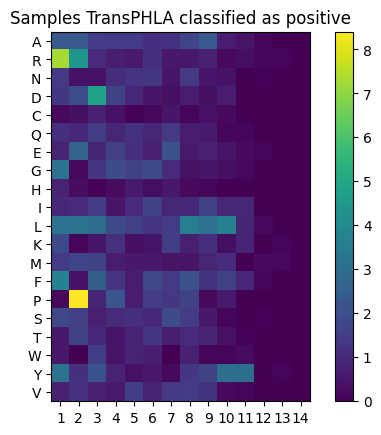

In [23]:
import matplotlib.pyplot as plt 
plt.imshow( contribs_pos ) 
  
plt.title( "Samples TransPHLA classified as positive" ) 
plt.colorbar() 
plt.xticks(ticks=range(14), labels=range(1, 15))
# plt.yticks(ticks=range(7), labels=range(8, 15))
plt.yticks(ticks=range(len(aa_array)), labels=aa_array)
plt.show() 

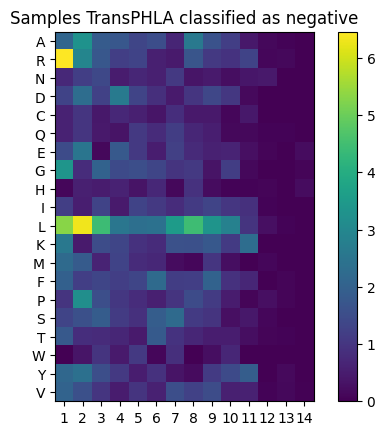

In [24]:
import matplotlib.pyplot as plt 
plt.imshow( contribs_neg ) 
  
plt.title( "Samples TransPHLA classified as negative" ) 
plt.colorbar() 
plt.xticks(ticks=range(14), labels=range(1, 15))
# plt.yticks(ticks=range(7), labels=range(8, 15))
plt.yticks(ticks=range(len(aa_array)), labels=aa_array)
plt.show() 